#### **YOUTHRIVE DATA SCIENCE CAPSTONE PROJECT**

#### **This a project  aim at developing a machine learning model to predicts whether a person's income exceeds $50K/yr based on a given census data**
- I will be starting off by importing my libraries which is going to be useful and also importing my data sets to study it and check for any discrepancy
- So i will be doing different exploratory data anlysis to check patterns to give me a better understanding of my data
- I will be using PCA as a tool for my data preprocessing and simple imputer to handle missing data
- From the project it is a classification task 
- After training and testing my data i will be using some metric to know how effective my models are in the prediction

In [243]:
"""
this cell will contain all my relevant libraries to be use in the prediction
"""

#importing libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder #  using one label encoder for my categorical values

from sklearn.model_selection import GridSearchCV # making use of randomized search because it is faster

from sklearn.impute import SimpleImputer # handling missing values


from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# setting plt style
plt.style.use("ggplot")
                 

In [257]:
"""
Importion our Evaluation metrics
"""

from sklearn.metrics import (accuracy_score,
                            roc_curve,
                            recall_score,
                            confusion_matrix,
                            f1_score,
                            roc_auc_score,
                            auc
                                
)

""" importing our traintest split"""
from sklearn.model_selection import train_test_split


In [307]:
# importing our csv file for the 

df = pd.read_csv('income_data.csv') 

In [7]:
#inspecting the first few rows of the datasets to understand the structure

df.head(3) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [10]:
df.shape # checkin the shape of our datasets

(48842, 15)

In [11]:
df.dtypes # reviewing the data types and the summary of the datasets

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [310]:
df.describe() #descriptive analysis

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
print(df.isnull().sum())# checking for missing values
print(df.duplicated().sum()) # checking duplicate


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
48


#### **from above we already have 9 categorical variable and 3 out the nine category have missing value so i will be dropping  the null values**

In [9]:
new_df =df.dropna(inplace = True)

In [10]:
df.isnull().sum()# checking after droping missing value

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:

df.drop_duplicates(inplace = True) # droping duplicates



In [12]:
#getting numeric data

num_data = df.select_dtypes("int64")
num_data.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [13]:
#checking categorical variables
cat_data = df.select_dtypes("object")
cat_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


#### **EXPLORATORY DATA ANALYSIS OF THE GIVEN DATASET**

<Axes: xlabel='education'>

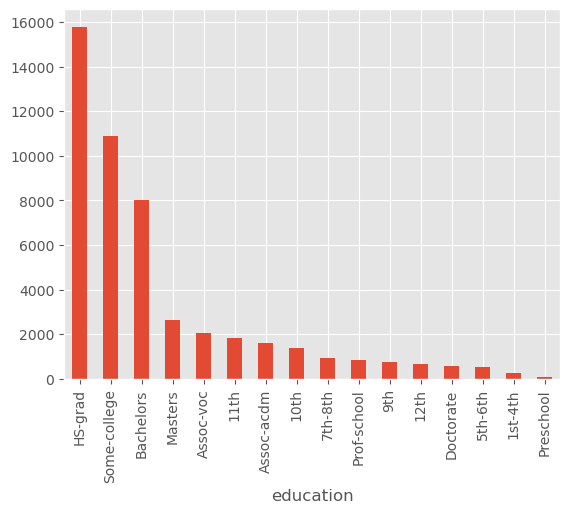

In [309]:
#  bar chat displaying the education distribution this is a univarate EDA due to using only one variable
df["education"].value_counts().plot.bar()

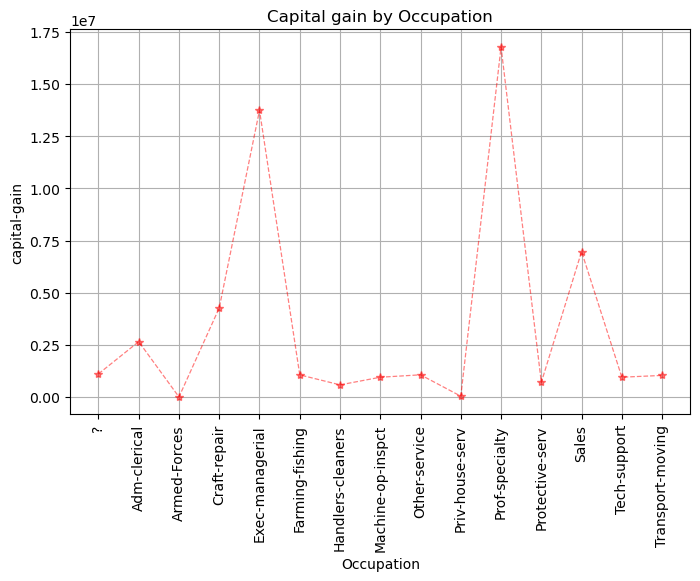

In [23]:
""" plotting a line chart showing relation between occupation and capital-gain"""

Occ = df.groupby('occupation')['capital-gain'].sum()

# Plotting
plt.figure(figsize=(8, 5))

x=Occ.index
y=Occ.values

plt.plot(x, y, color='red', linestyle='--',
         linewidth=0.9, marker="*", alpha=0.5)
plt.xticks(rotation=90)
plt.title('Capital gain by Occupation')
plt.xlabel("Occupation")
plt.ylabel("capital-gain")
plt.grid(True)
plt.show()

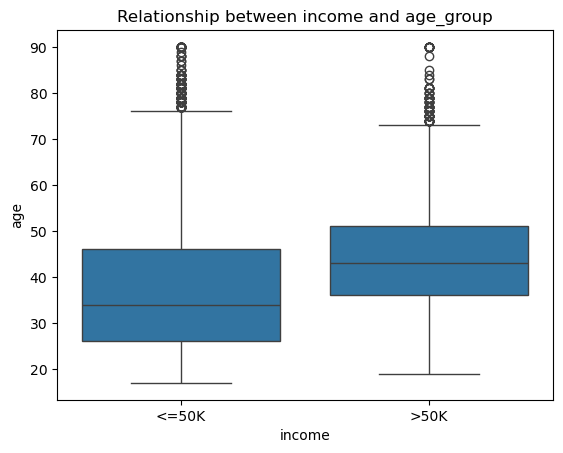

In [33]:
""" ploing a boxplot showing the relationship of age to the income"""
sns.boxplot(data = df, y ="age", x ="income")
plt.title('Relationship between income and age_group')
plt.show()

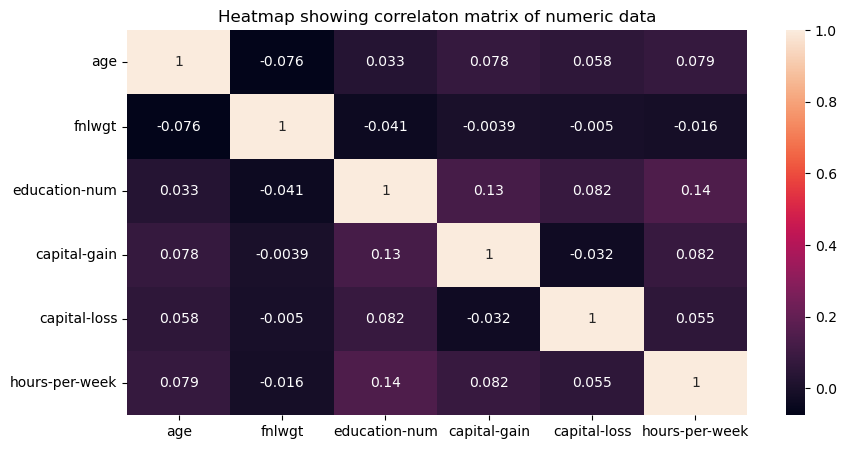

In [82]:
""" calculating  the correlation matrix  of numeric data using heat map"""

num_data_corr = num_data.corr()
plt.figure(figsize = (10,5))

sns.heatmap(df_num_corr,linecolor='green', cmap=None, annot = True)
plt.title('Heatmap showing correlaton matrix of numeric data')
plt.show()


## intepretation of the heatmap matrix
- the classes having negative figures are having weak negative correlation between them.
- the clasess havine a positive value less 1 have weak positive correlation.
- Diagonal Element show the correlation of each variable with itself which is always **`1`**

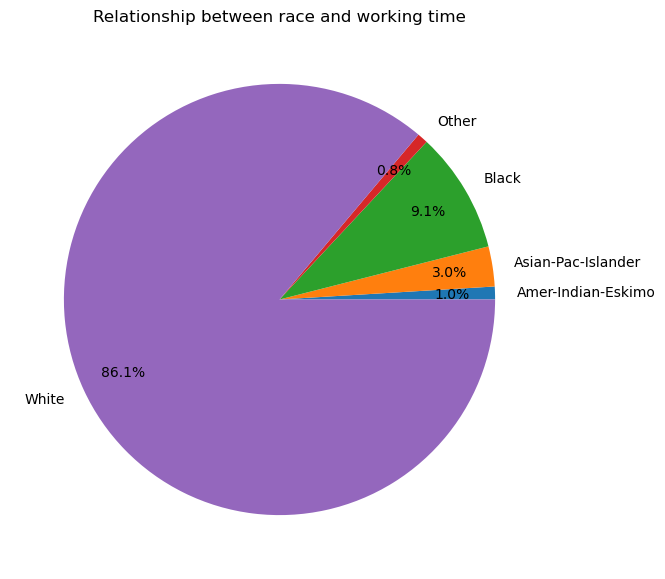

In [35]:
" checking insight of the relationship between working hours and race using pie chart"
race_time = df.groupby('race')['hours-per-week'].sum()

x=race_time.index
y=race_time.values

plt.figure(figsize=(7, 7))
plt.pie(y, labels=x, autopct='%1.1f%%', pctdistance = 0.8,)
plt.title('Relationship between race and working time')
plt.show()

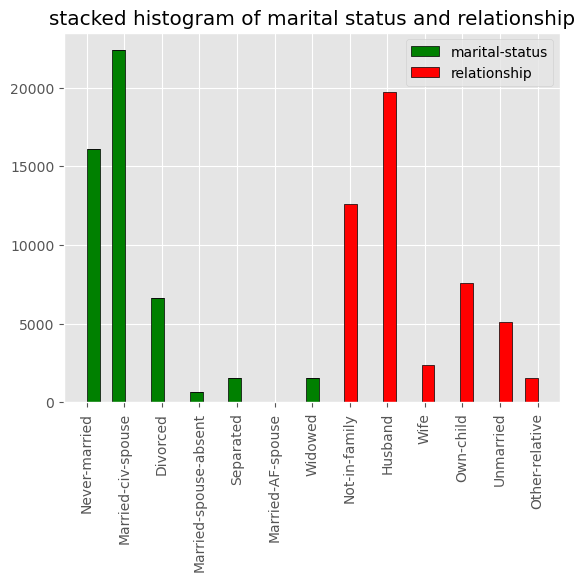

In [317]:
"""Histogram"""
data1 = df['marital-status']
data2 = df['relationship']

plt.hist([data1, data2],
         bins=35, 
         stacked = True,
         edgecolor='black',
         color=['green', 'red'])
plt.title('stacked histogram of marital status and relationship')
plt.xticks(rotation = 90)
plt.legend(['marital-status', 'relationship'])
plt.show()

 #### **`Data preprocessing and feature Engineering`** 
 - *will be handling missing values*
 - *data preprocessing using LabelEnconder and the the essential parameter for data preprocessing the fit and transform method*
 - *converting categorical data and standardizing the numerical features*
 - *feauture selection*

#### **Encoding categorical variables using Pipeline**


In [202]:
X =  df.drop("income", axis=1)
y = df["income"]


In [249]:
# Using pipeline to preprocess our data

minmax = MinMaxScaler() #data normalization for numeric data
num_data = X.select_dtypes("int64").columns.to_list()

cat_data = X.select_dtypes("object").columns.to_list()


cat_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=True, handle_unknown = 'ignore')),
        
    ]
)



num_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaline", minmax)
    ]
)

"""label encoder for the target feauture"""
label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y)   
label = label_encoder.classes_
classes = np.unique(y_new)


""" using column transformer to combine the two pipes"""
combined = ColumnTransformer(
    [
        ("cat", cat_pipe, cat_data),
        ("num", num_pipe, num_data)
    ]
)



"""models for training"""
rf = RandomForestClassifier(),
svc = SVC(probability = True)
lr=LogisticRegression()
DT = DecisionTreeClassifier()

""" SVC TRAINING"""
pipe_line_svc = Pipeline(
    steps=[
        ("preprocessing", combined),
        ("pca", PCA(n_components=5, svd_solver ="arpack")),
        ("model", svc)
        
    ]
)

"""rf"""
pipe_line_rf = Pipeline(
    steps=[
        ("preprocessing", combined),
        ("pca", PCA(n_components=5, svd_solver ="arpack")),
        ("model", RandomForestClassifier())
        
    ]
)

"""DECISION TREE TRAINING"""
pipe_line_dt = Pipeline(
    steps=[
        ("preprocessing", combined),
        ("pca", PCA(n_components=5, svd_solver ="arpack")),
        ("model", DT)
        
    ]
)

""" LOGISTIC REGRESSION"""
pipe_line_lr = Pipeline(
    steps=[
        ("preprocessing", combined),
        ("pca", PCA(n_components=5, svd_solver ="arpack")),
        ("model", lr)
        
    ]
)

""" KNN"""
pipe_line_knn = Pipeline(
    steps=[
        ("preprocessing", combined),
        ("pca", PCA(n_components=5, svd_solver ="arpack")),
        ("model", KNeighborsClassifier())
        
    ]
)

In [251]:
"""MODEL DEVELOPMENT"""
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

In [252]:
PIPELINES = [pipe_line_lr, pipe_line_dt, pipe_line_svc,  pipe_line_rf, pipe_line_knn]
for pipe in PIPELINES:
    pipe.fit(X_train, y_train)


In [34]:


""" LOGISTIC REG PIELINES WITH GRID SEARCH"""
param_grid2 = {
    'pca__n_components': [2, 3, 4],
    'model__C': [0.1, 1, 10]
}



""" DECISION TREE PIELINES WITH GRID SEARCH"""
param_grid3 = {

    # 'min_samples_leaf': [2, 3, 4],
    #'max_feature': [0.1, 1, 10],
    # 'max_depth': [2, 3, 4]
    
}

In [174]:
"""Hyperparameter Tunning with GridSearch"""

grid_search = GridSearchCV(pipe_line_svc, param_grid, cv=5,  scoring='accuracy')  # SVC

grid_search2 = GridSearchCV(pipe_line_lr, param_grid2, cv=5, scoring='accuracy') # LOGISTIC REGRESSION

grid_search3 = GridSearchCV(pipe_line_dt, param_grid3, cv=5, verbose = 2) # DECISION TREE

grid_search4 = GridSearchCV(pipe_line_rf, param_grid3, cv=5, scoring='accuracy') #RANDOM FOREST 

grid_search5 = GridSearchCV(pipe_line_knn, param_grid3, cv=5, scoring='accuracy')#KNN

In [ ]:
#Grid search for SVC
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_

print("this is the best score for SVC", {best_score})
print("=*30")

#Grid search for Log Reg
grid_search2.fit(X_train, y_train)

best_score = grid_search2.best_score_

print("this is the best score for LOGISTIC REGRESSION", {best_score})
print("=*30")

#grid search for decision tree
grid_search3.fit(X_train, y_train)


best_score = grid_search3.best_score_

print("this is the best score for DECISION TREE", {best_score})
print("=*30 ")

#grid search for random forest
grid_search4.fit(X_train, y_train)

best_score = grid_search4.best_score_

print("this is the best score for rf", {best_score})
print("=*30")

#grid search for kneigbors
grid_search5.fit(X_train, y_train)

best_score = grid_search5.best_score_

print("this is the best score for knn", {best_score})


this is the best score for SVC {0.8409386698841473}
=*30
this is the best score for LOGISTIC REGRESSION {0.8195939862847677}
=*30
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.8s
this is the best score for DECISION TREE {0.7835844812229833}
=*30 
this is the best score for rf {0.834335638856124}
=*30


In [254]:
#grid search for kneigbors
grid_search5.fit(X_train, y_train)

best_score = grid_search5.best_score_

print("this is the best score for knn", {best_score})

this is the best score for knn {0.8237144839527982}


#### **Testing data against trained data Evaluation**

In [265]:
"""PREDICTION OF TESTING DATA"""
y_pred_rf = pipe_line_rf.predict(X_test)
y_pred_dt = pipe_line_dt.predict(X_test)
y_pred_knn = pipe_line_knn.predict(X_test)
y_pred_svc = pipe_line_svc.predict(X_test)
y_pred_lr = pipe_line_lr.predict(X_test)

In [290]:
"""ACCURACY, PRECISION, RECALL SCORE OF USED MODELS"""

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
F1_SCORE =f1_score(y_test, y_pred_rf)
print("this is the accuracy score for Random Forest", {accuracy})
print("this is the precision score for Random Forest", {precision})
print("this is the recall score for Random Forest", {recall})
print("this is the F1 score for Random Forest", {F1_SCORE})
print("==============================================")

accuracy2 = accuracy_score(y_test, y_pred_knn)
precision2 = precision_score(y_test, y_pred_knn)
recall2 = recall_score(y_test, y_pred_knn)
F1_SCORE2 =f1_score(y_test, y_pred_knn)
print("this is the accuracy score for KNeighbors", {accuracy2})
print("this is the precision score for  KNeighbors", {precision2})
print("this is the recall score for  KNeighbors", {recall2})
print("this is the F1 score for  KNeighbors", {F1_SCORE2})                    
print("==============================================")
                    

accuracy3 = accuracy_score(y_test, y_pred_svc)
precision3 = precision_score(y_test, y_pred_svc)
recall3 = recall_score(y_test, y_pred_svc)
F1_SCORE3 =f1_score(y_test, y_pred_svc)
print("this is the accuracy score for SVC", {accuracy3})
print("this is the precision score for SVC", {precision3})
print("this is the recall score for  SVC", {recall3})
print("this is the F1 score for  SVC", {F1_SCORE3})
print("==============================================")

accuracy4 = accuracy_score(y_test, y_pred_lr)
precision4 = precision_score(y_test, y_pred_lr)
recall4 = recall_score(y_test, y_pred_lr)
F1_SCORE4 =f1_score(y_test, y_pred_lr)
print("this is the accuracy score for Logistic Regression", {accuracy4})
print("this is the precision score for Logistic Regression", {precision4})
print("this is the recall score for Logistic Regression", {recall4})
print("this is the F1 score for Logistic Regression", {F1_SCORE4})
print("==============================================")

accuracy5 = accuracy_score(y_test, y_pred_dt)
precision5 = precision_score(y_test, y_pred_dt)
recall5 = recall_score(y_test, y_pred_dt)
F1_SCORE5 =f1_score(y_test, y_pred_dt)
print("this is the accuracy score for Decision Tree", {accuracy5})
print("this is the precision score forDecision Tree", {precision5})
print("this is the recall score for Decision Tree", {recall5})
print("this is the F1 score for Decision Tree", {F1_SCORE5})

this is the accuracy score for Random Forest {0.8166649605896202}
this is the precision score for Random Forest {0.6385068762278978}
this is the recall score for Random Forest {0.5520169851380042}
this is the F1 score for Random Forest {0.5921202459576407}
this is the accuracy score for KNeighbors {0.8149247620022521}
this is the precision score for  KNeighbors {0.6298054105363076}
this is the recall score for  KNeighbors {0.5634819532908705}
this is the F1 score for  KNeighbors {0.5948005378753922}
this is the accuracy score for SVC {0.8244446719213839}
this is the precision score for SVC {0.7025316455696202}
this is the recall score for  SVC {0.4713375796178344}
this is the F1 score for  SVC {0.5641677255400254}
this is the accuracy score for Logistic Regression {0.8161531374756884}
this is the precision score for Logistic Regression {0.6816114359974009}
this is the recall score for Logistic Regression {0.4454352441613588}
this is the F1 score for Logistic Regression {0.5387776065742

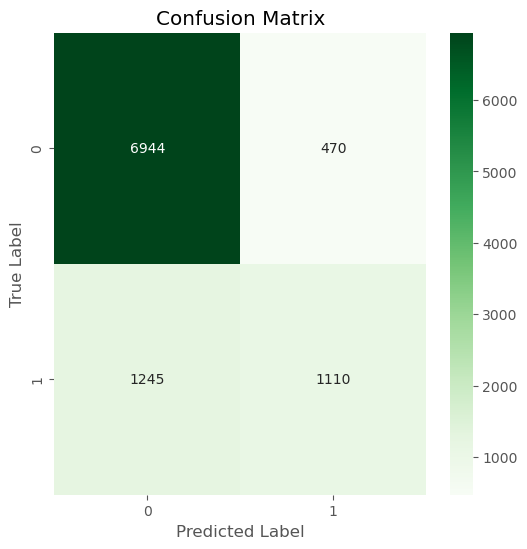

In [318]:
""" CONFUSION MATRIX for SVC"""

cofusion_mx = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize = (6,6))
sns.heatmap(cofusion_mx, annot =True, fmt ='d', cmap = 'Greens')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

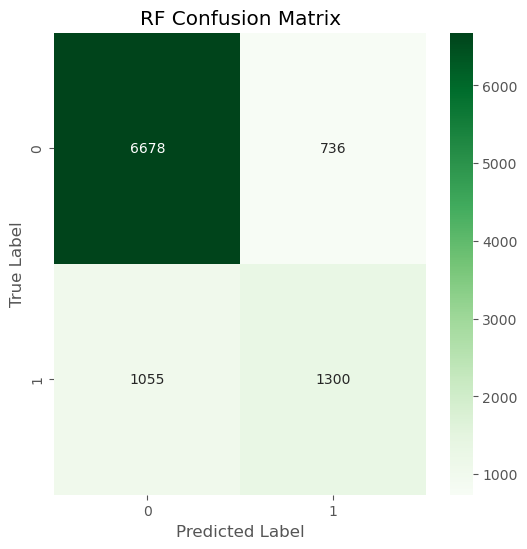

In [284]:
""" CONFUSION MATRIX FOR RANDOM FOREST"""

cofusion_mx = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize = (6,6))
sns.heatmap(cofusion_mx, annot =True, fmt ='d', cmap = 'Greens')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RF Confusion Matrix")
plt.show()

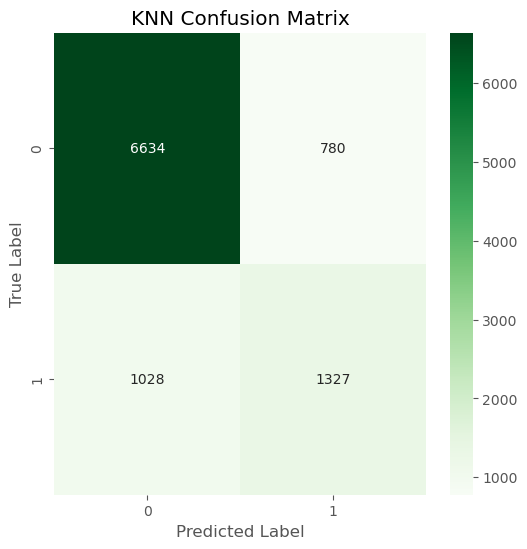

In [286]:
""" CONFUSION MATRIX FOR KNN"""

cofusion_mx = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize = (6,6))
sns.heatmap(cofusion_mx, annot =True, fmt ='d', cmap = 'Greens')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.show()

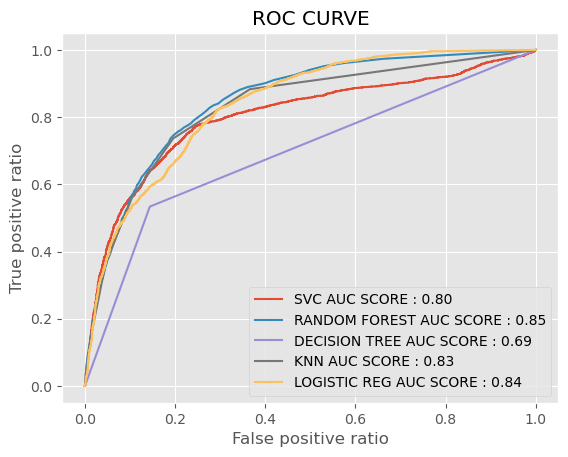

In [283]:
"""ROC/ AUC CURVE"""

y_pred_proba_svc = pipe_line_svc.predict_proba(X_test)
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_pred_proba_svc[:,1])
auc_score_svc = auc(fpr_svc, tpr_svc)

y_pred_proba_rf = pipe_line_rf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf[:,1])
auc_score_rf = auc(fpr_rf, tpr_rf)

y_pred_proba_knn = pipe_line_knn.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_proba_knn[:,1])
auc_score_knn = auc(fpr_knn, tpr_knn)

y_pred_proba_dt = pipe_line_dt.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_proba_dt[:,1])
auc_score_dt = auc(fpr_dt, tpr_dt)

y_pred_proba_lr = pipe_line_lr.predict_proba(X_test)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_proba_lr[:,1])
auc_score_lr = auc(fpr_lr, tpr_lr)

#plotting graph for roc
plt.plot(fpr_svc, tpr_svc, label=(f"SVC AUC SCORE : {auc_score_svc:.2f}"))
plt.plot(fpr_rf, tpr_rf, label=(f"RANDOM FOREST AUC SCORE : {auc_score_rf:.2f}"))
plt.plot(fpr_dt, tpr_dt, label=(f"DECISION TREE AUC SCORE : {auc_score_dt:.2f}"))
plt.plot(fpr_knn, tpr_knn, label=(f"KNN AUC SCORE : {auc_score_knn:.2f}"))
plt.plot(fpr_lr, tpr_lr, label=(f"LOGISTIC REG AUC SCORE : {auc_score_lr:.2f}"))


plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC CURVE")
plt.legend()
plt.show()

In [294]:
""" SAVING MODEL FOR FUTURE USE usinh joblib or pickle"""
import joblib, pickle

In [296]:
GRIDSEARCH = ['grid_search', 'grid_search2', 'grid_search3','grid_search4','grid_search5',]

In [295]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [305]:
joblib.dump(GRIDSEARCH, 'model.joblib')
joblib.dump(PIPELINES, 'model.joblib')
joblib.dump(rf, 'random_forest.pkl')
joblib.dump(svc, 'SVC.pkl')
joblib.dump(DT, 'Decison tree.pkl')
joblib.dump(KNeighborsClassifier(), 'knn.pkl')
joblib.dump(lr, 'log_reg.pkl')

['log_reg.pkl']

## **SUMMARY and RECOMMENDATIONS**

- In summary this is a data sets predicting the income of a person wheather it is above 50K/yr or not
- from the exploratory data analysis there were visual trends of education the HS-GRADE has a higher frequency than those from other groups.
- from the line chart showing the relationship of education to capital gain and PROF-SPECIALTY has a higher capital compare to others
- from the boxplot we saw outliers from the income and age and the age group that has <=50K/yr and age group having above 50K/yr.
- from the heatmap there were negative and positive weak correlation amongst feautures.
- from the pie chart the relationship between race and working hours was visualize with white race having higher working hours than the others.
- Also a stacked histogram of marital status and relationship with married civil spouse and husband having high frequency respectively.
- from the overall model random forest showed a higher predictediction than the other models making it a good model prediction that others.
- from the recall score of of random forest tree it correctly identify 60% of actual positive instances in the datasets
- the precision score predicted 64% of actual positive instances and the F1 score of 0.59 makes the model somewhat effective.
- Although SVC gave an higher accuracy score than other model but random forest tree gave a betterr AUC score compare the others which make it disxriminate between positive and negative classes.

RECOMENDATION
- the above model can be improve  by using XGBoost, which is a better model although i couldnt install XGboost which why i used random forest
- also by improving feauture engineering by dropping irrelevant feauture can improve model prediction
- optimizing hyperparameter such as maximum depth, number of tree and so on .